In [ ]:
# Import libraries
from PIL import Image
import cv2
import numpy as np
import requests

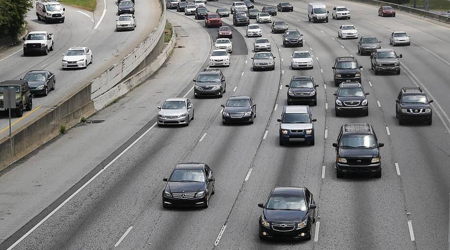

In [25]:
image = Image.open(requests.get('https://a57.foxnews.com/media.foxbusiness.com/BrightCove/854081161001/201805/2879/931/524/854081161001_5782482890001_5782477388001-vs.jpg', stream=True).raw)
image = image.resize((450,250))
image_arr = np.array(image)
image

In [27]:
import torch
import cv2
import numpy as np
from PIL import Image

# Load the pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)


# Perform inference
results = model(image)

# Extract detection results
detections = results.pandas().xyxy[0]  # Get bounding boxes as a pandas DataFrame

# Filter detections for cars and trucks
car_classes = [2, 3, 5, 7]  # COCO class IDs: 2=Car, 3=Motorcycle, 5=Bus, 7=Truck
car_detections = detections[detections['class'].isin(car_classes)]

# Count the number of cars
num_car1 = len(car_detections)
print(f"Number of cars detected: {num_car1}")




Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-1-26 Python-3.11.11 torch-2.5.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Number of cars detected: 24


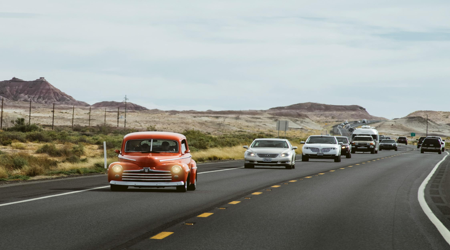

In [12]:

image2 = Image.open(requests.get('https://images.pexels.com/photos/612888/pexels-photo-612888.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2', stream=True).raw)
image2 = image.resize((450,250))
image_arr = np.array(image2)
image2

In [19]:
# Perform inference
results = model(image2)

# Extract detection results
detections = results.pandas().xyxy[0]  # Get bounding boxes as a pandas DataFrame

# Filter detections for cars and trucks
car_classes = [2, 3, 5, 7]  # COCO class IDs: 2=Car, 3=Motorcycle, 5=Bus, 7=Truck
car_detections = detections[detections['class'].isin(car_classes)]

# Count the number of cars
num_car2 = len(car_detections)
print(f"Number of cars detected: {num_car2}")

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Number of cars detected: 8


In [28]:
if num_car1 > num_car2 :
    green_side = "Side 1"
elif num_car2  > num_car1:
    green_side = "Side 2"
else:
    green_side = "Both sides have equal cars, use default timing"

# Print decision
print(f"Cars on Side 1: {num_car1}")
print(f"Cars on Side 2: {num_car2}")
print(f"Green signal for: {green_side}")

Cars on Side 1: 24
Cars on Side 2: 8
Green signal for: Side 1
